# Ch.4 모델 훈련

## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1) # y=4+3x+gaussian noise

In [3]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가

### 정규방정식으로 선형회귀 풀기

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.08934916],
       [2.94412425]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [7]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08934916],
       [9.97759766]])

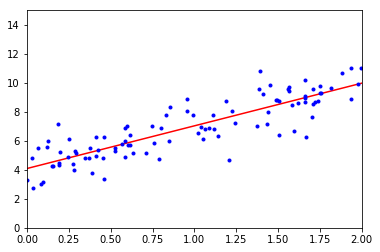

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 같은 작업을 하는 사이킷런 코드

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.08934916]), array([[2.94412425]]))

In [14]:
lin_reg.predict(X_new)

array([[4.08934916],
       [9.97759766]])

### 배치 경사 하강법

In [15]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

In [16]:
theta = np.random.randn(2,1) # 무작위 초기화

In [17]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.08934916],
       [2.94412425]])

### 확률적 경사 하강법

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터

In [20]:
def learning_schedule(t):
    return t0 / (t+t1)

In [21]:
theta = np.random.randn(2,1)

In [22]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [23]:
theta

array([[4.12394539],
       [2.90688173]])

### 사이킷런에서 SGD

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0554438]), array([2.9058301]))

## 다향 회귀

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

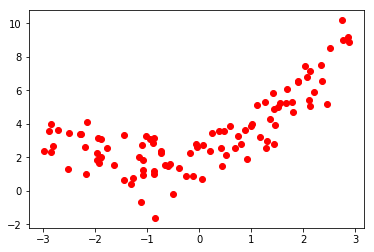

In [28]:
plt.plot(X, y, 'ro')

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [31]:
X_poly = poly_features.fit_transform(X)

In [32]:
X[0]

array([2.75893402])

In [33]:
X_poly[0]

array([2.75893402, 7.61171695])

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lin_reg.intercept_, lin_reg.coef_

(array([2.06321335]), array([[0.98700363, 0.50880907]]))

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='training set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='validation set')

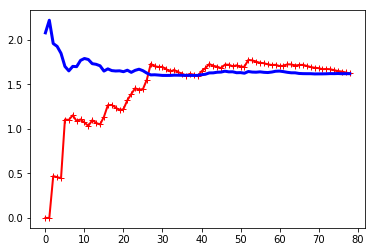

In [39]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),])

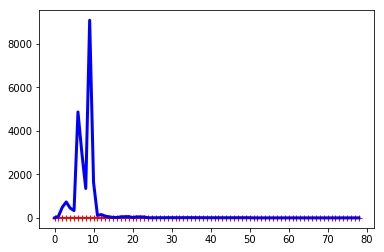

In [42]:
plot_learning_curves(polynomial_regression, X, y)

## 규제가 있는 선형모델

### overfitting을 감소시키는 방법으로 regularization을 사용

#### Ridge 회귀

In [43]:
from sklearn.linear_model import Ridge

In [44]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [46]:
ridge_reg.predict([[1.5]])

array([[4.83225939]])

In [48]:
sgd_reg = SGDRegressor(max_iter=5, penalty='l2') # penalty에 L2 Regularization 사용
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [49]:
sgd_reg.predict([[1.5]])

array([3.94684013])

#### Lasso 회귀

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.78092529])

#### 엘라스틱넷

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [54]:
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78388102])